In [3]:
import numpy as np
from matplotlib import pyplot as plt

import AWG70002A as awg
awg_ip = "192.168.0.198"

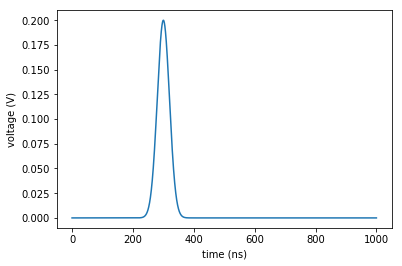

target ip : 192.168.0.198
connect to device ...
*IDN?
TEKTRONIX,AWG70002A,B030548,FV:7.1.0170.0
success!
STOP!
NOTE: overriding sample rate to match desired period!
have to concatenate 1 samples into memory to achieve desired period
attempting to set sample rate : 8.000000e+09 Hz
read back sample rate (Hz):
8.0000000000E+9
success!
preparing data for channel 1
sending data ...
waveform length: 8000
sample length: 8000
RUN!
close socket


In [4]:
##################################################
##                 gauss pulse                  ##
##################################################


def gauss(x, **kwargs):
  mu = kwargs.get("mu",0)
  sigma = kwargs.get("sigma",1)
  ## default amplitude generates bell curve with area = 1
  A = kwargs.get("A",1./(sigma*(2.*np.pi)**0.5))
  return A*np.exp(-(x-mu)**2/(2.*sigma**2))



period = 1e-6

x=np.arange(0,period,0.1e-9)

y=gauss(x,sigma=20e-9,mu=300e-9,A=200e-3)

plt.plot(x*1e9,y)
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
plt.show()

awg.send_data(x,y,
              trace=1,
              ip=awg_ip,
              period=period)

In [5]:
##################################################
##               reference pulse                ##
##################################################

awg.pulser(
    trace=2,
    ip=awg_ip,
    on_val=200e-3,
    width=50e-9,
    leading_edge=2e-9,
    trailing_edge=2e-9,
    delay=0e-9,
    period=period
)

target ip : 192.168.0.198
connect to device ...
*IDN?
TEKTRONIX,AWG70002A,B030548,FV:7.1.0170.0
success!
STOP!
NOTE: overriding sample rate to match desired period!
have to concatenate 1 samples into memory to achieve desired period
attempting to set sample rate : 8.000000e+09 Hz
read back sample rate (Hz):
8.0000000000E+9
success!
preparing data for channel 2
sending data ...
waveform length: 8000
sample length: 8000
RUN!
close socket
